In [0]:
import keras
from keras.models import load_model

In [0]:
import numpy as np
import keras.backend as K

In [69]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
model = load_model("/content/gdrive/My Drive/best_model.h5")

In [0]:
from matplotlib.pyplot import imshow
from keras.preprocessing.image import img_to_array

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [73]:
validate = ImageDataGenerator().flow_from_directory("/content/gdrive/My Drive/chest_xray/val", target_size=(250,250))

Found 16 images belonging to 2 classes.


In [74]:
model.evaluate_generator(validate)

[0.03590122610330582, 1.0]

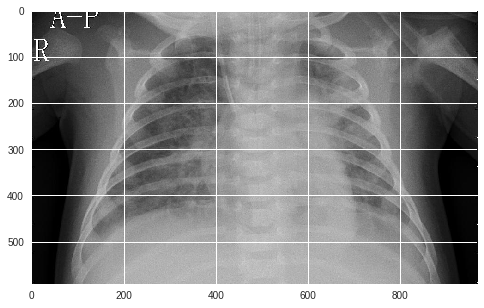

In [155]:
img_path = "/content/gdrive/My Drive/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg"
img = keras.preprocessing.image.load_img(img_path)
imshow(img)
img_array = np.array(img_to_array(img))

In [0]:
original_img_1 = keras.preprocessing.image.load_img(img_path, target_size=(250,250))
original_img_2 = np.array(original_img_1)
original_img = np.expand_dims(original_img_2, axis=0)

gap weights:  (512, 2)
(1, 2)
features for one image:  (15, 15, 512)
height_roomout:  16.666666666666668
width_roomout:  16.666666666666668
cam_features: (250, 250, 512)
cam weights:  (512,)
(16, 250, 250, 3)


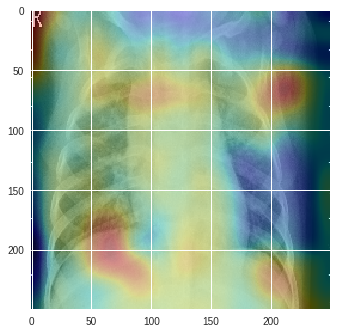

In [156]:
# import Numpy, Scipy, and Matplotlib
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# import Keras's functional api
from keras.models import Model

# get the weights from the last layer
gap_weights = model.layers[-1].get_weights()[0]
print("gap weights: ",gap_weights.shape)

# create a new model to output the feature maps and the predicted labels
cam_model = Model(inputs=model.input, 
                    outputs=(model.layers[-4].output, model.layers[-1].output)) 

# make the prediction for a set of test images

conv_out , results = cam_model.predict(original_img)
print(results.shape)
# check the prediction for 10 test images
for idx in range(1):   
    # get the feature map of the test image
    features_for_one_img = conv_out[idx, :, :, :]
    print("features for one image: " ,features_for_one_img.shape)

    # map the feature map to the original size
    height_roomout = 250 / features_for_one_img.shape[0]
    width_roomout = 250 / features_for_one_img.shape[1]
    print("height_roomout: ", height_roomout)
    print("width_roomout: ", width_roomout)
    cam_features = sp.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)
    print("cam_features:" ,cam_features.shape)
        
    # get the predicted label with the maximum probability
    pred = np.argmax(results[idx])
    
    # prepare the final display
    plt.figure()
    
    # get the weights of class activation map
    cam_weights = gap_weights[:, pred]
    print("cam weights: ",cam_weights.shape)
    # create the class activation map
    cam_output = np.dot(cam_features, cam_weights)
    
    # draw the class activation map
#     ax.set_xticklabels([])
#     ax.set_yticklabels([])
    
    #buf = 'Predicted Class = ' + fashion_name[pred] + ', Probability = ' + str(results[idx][pred])
#     plt.xlabel(buf)

    print(features.shape)
    plt.imshow(original_img_2,cmap='jet',alpha=1)
    plt.imshow(cam_output, cmap='jet', alpha=0.3)
     
    plt.show() 

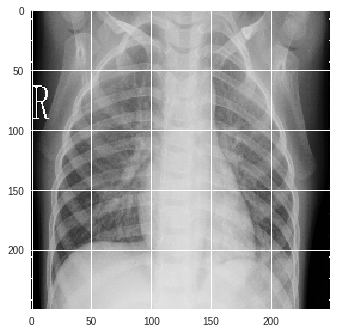

In [151]:
imshow(original_img_2, alpha=1)